In [1]:
import pandas as pd
import os, sys, subprocess

In [2]:
workingdir = r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/123experiments/experiment3"
execdir = "/Users/filippo/Developer/tesi"
dockerurl = "cloudadm@193.144.35.220:/home/cloudadm/drive"

In [3]:
os.chdir(workingdir)

# Get the data
[Table_creation](Table_creation.ipynb) does this for you

# Get annotations

In [4]:
df_file=pd.read_csv("files.dat", index_col=[0])
df_file.head()

,primary_site,secondary_site
_c0,,
GTEX-12ZZZ-0011-R4b-SM-5DUV7,Brain,Brain - Amygdala
GTEX-13FLV-0011-R4a-SM-5LZYU,Brain,Brain - Amygdala
GTEX-13NYS-0011-R4b-SM-5MR3O,Brain,Brain - Amygdala
GTEX-13O3Q-0011-R4a-SM-5P9H2,Brain,Brain - Amygdala
GTEX-13OVJ-0011-R4b-SM-5P9H5,Brain,Brain - Amygdala


In [5]:
pc=pd.read_csv("%s/genes.txt"%execdir, index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

,lenght,type_of_gene,exons
ENSG00000167578,18722.0,protein-coding,18696.0
ENSG00000078237,46830.0,protein-coding,38812.0
ENSG00000146083,11328.0,protein-coding,10691.0
ENSG00000158486,226330.0,protein-coding,217697.0
ENSG00000198242,4966.0,protein-coding,4375.0


# Run statistics
```python
import tacos
tacos.statistics()
tacos.shuffleLabels()
```

CHECK **BioParameters.h** before compiling

In [24]:
os.chdir(workingdir)
os.system("cp %s/tacos/master/python/addo.py ."%execdir)
os.system("cp %s/tacos/master/data_mining ."%execdir)
os.system("chmod +x data_mining")
os.system("mv mainTable_all.csv mainTable.csv")
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")

0

# Analyse table and select genes

[Table_Analyser.ipynb](Table_Analyzer.ipynb)

In [25]:
os.chdir(execdir)
from tableanalyser import scalinglawsandoverexpressed

<class 'pandas.core.frame.DataFrame'>
Index: 18913 entries, ENSG00000186092 to ENSG00000198727
Columns: 999 entries, GTEX-ZPCL-0006-SM-4WWAS to GTEX-V955-2026-SM-3GAFA.1
dtypes: float64(2), int64(997)
memory usage: 144.3+ MB
None
genes:18913	realizations:999
<class 'pandas.core.frame.DataFrame'>
Index: 18913 entries, ENSG00000186092 to ENSG00000198727
Data columns (total 4 columns):
mean            18913 non-null float64
variance        18913 non-null float64
type_of_gene    18913 non-null object
occurrence      18913 non-null float64
dtypes: float64(3), object(1)
memory usage: 738.8+ KB
None


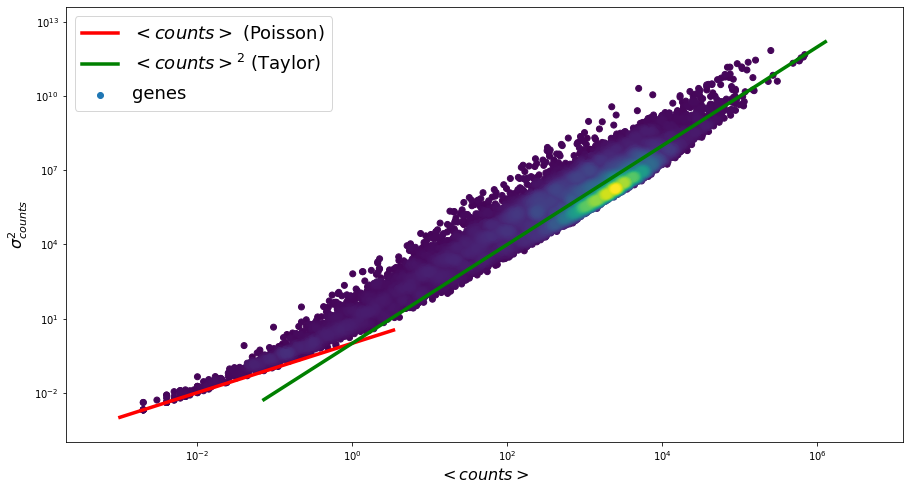

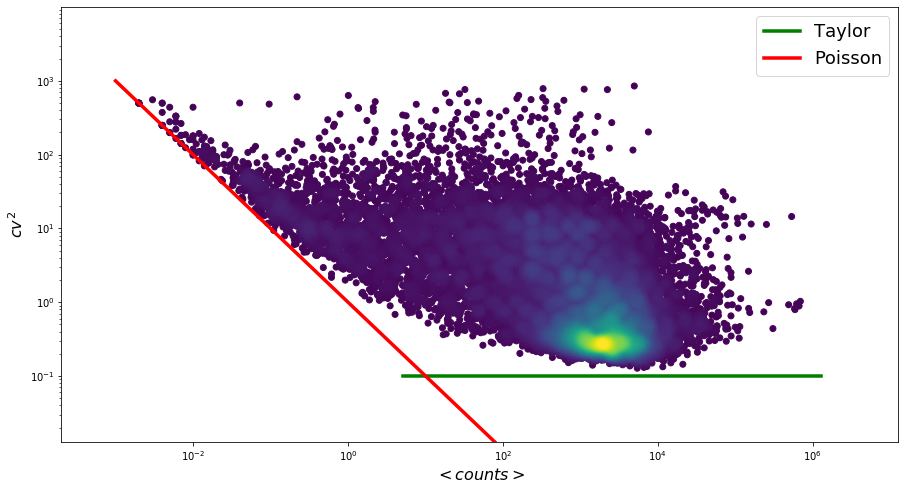

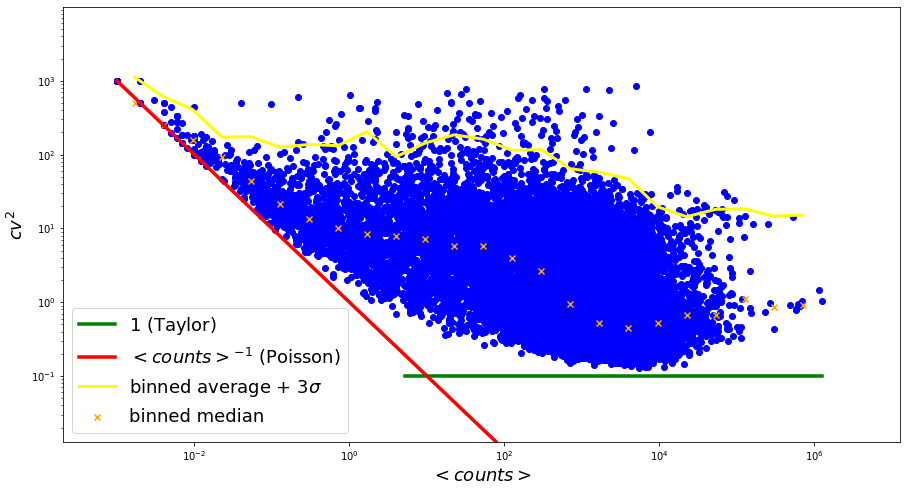

found 2929 highly variable genes


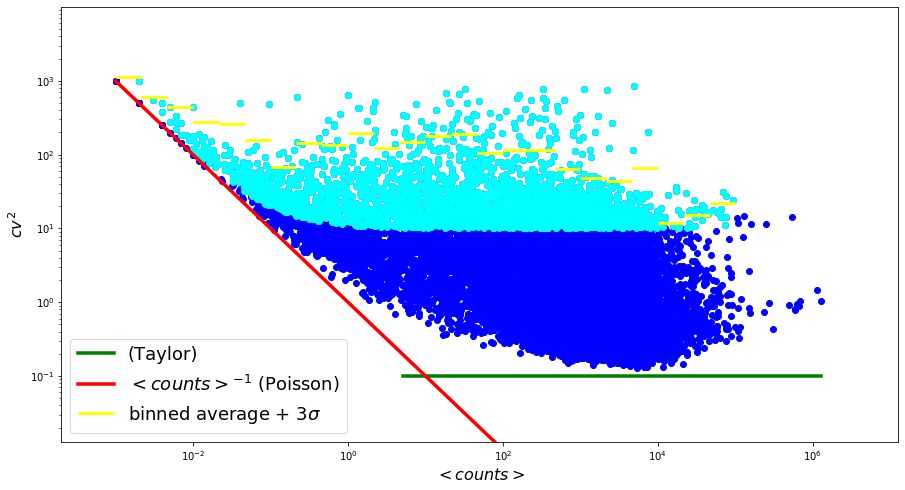

In [26]:
scalinglawsandoverexpressed(workingdir)

In [27]:
os.chdir(workingdir)
os.system("mv mainTable.csv mainTable_all.csv")
os.system("mv mainTable_over.csv mainTable.csv")

0

# Make bipartite network
```bash
python addo.py
```
```python
import tacos
tacos.makegraph()
```

In [28]:
os.chdir(workingdir)
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")
os.system("./data_mining 7")
#os.system("scp graph.xml.gz %s/."%dockerurl)

0

[hSBM.ipynb]()

# Run stochastic block model
```
docker run -it -p8888:8888 -v $(PWD)/drive/:/home/user/ fvalle01/hsbm bash
jupyter notebook --ip0.0.0.0 --allow-root
```

download the data

In [6]:
os.chdir(workingdir)
os.system("mkdir -p topsbm")
os.system("scp %s/* ."%dockerurl)

256

# Run cluster analysis

In [ ]:
os.chdir(execdir)
import hsbmpy,geneontology

In [ ]:
hsbmpy.clusteranalysis()

In [ ]:
geneontology.topicanalysis()

# Clean

In [ ]:
os.chdir(workingdir)
os.system("rm -rf data_mining addo.py")